In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from Router import *
from Packet import *
from Network import *
from Plotter import *
from Simulator import *
from utils import *

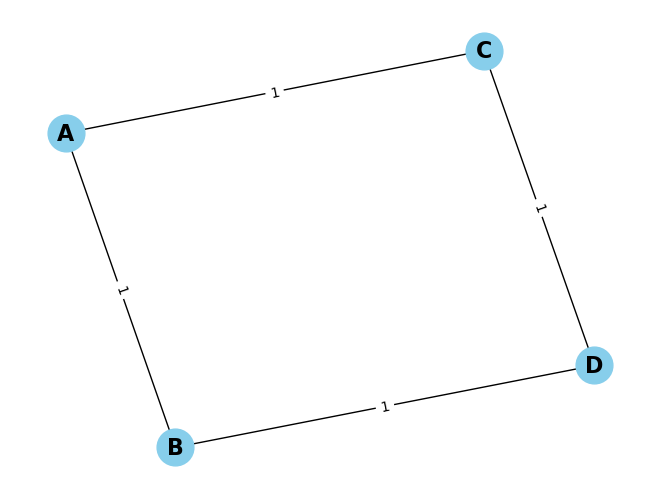

In [2]:
# The network is defined by a sequence of links: (node1, node2, etx, ticks)
# where ticks are the number of timesteps needed to send a packet between the nodes
links = [("A","B", 1, 1), ("B", "D", 1, 1), ("A", "C", 1, 1), ("C", "D", 1, 1)]

network = Network(links)

plot_network(network)


In [20]:
# Initial state is a dict per router with value (dummy packets, data packets), 
# where dummy packets are used to build the queue gradient

# Will hardcode this for now. Don't think I need to waste time with autogenerating this
# Sink is node with 0 dummy packets
init_states = {"A": (2,4), "B": (1, 3), "C": (1, 3), "D": (0,0)}
network.init(init_states)

Iteration: 0
[[[0, 0, 0], [0, 0, 1, 1, 1], [0, 1, 1, 1], []]]
Decision Phase Router: A
Next packet for router to send: Packet(ID: 25, Type: dummy, Progress: 0)
Decision Phase Router: B
Next packet for router to send: Packet(ID: 28, Type: dummy, Progress: 0)
Packet route: Router A, ETX: 1, Ticks: 1, type: dummy
Decision Phase Router: C
Next packet for router to send: Packet(ID: 33, Type: dummy, Progress: 0)
Packet route: Router D, ETX: 1, Ticks: 1, type: dummy
Decision Phase Router: D
Next packet for router to send: None
====
Send Phase Router: B
Moving Packet(ID: 28, Type: dummy, Progress: 1) to A
Send Phase Router: C
Moving Packet(ID: 33, Type: dummy, Progress: 1) to D
Iteration: 1
[[[0, 0, 0], [0, 0, 1, 1, 1], [0, 1, 1, 1], []], [[0, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1], []]]
Decision Phase Router: A
Next packet for router to send: Packet(ID: 25, Type: dummy, Progress: 0)
Decision Phase Router: B
Next packet for router to send: Packet(ID: 29, Type: dummy, Progress: 0)
Decision Phase Rou

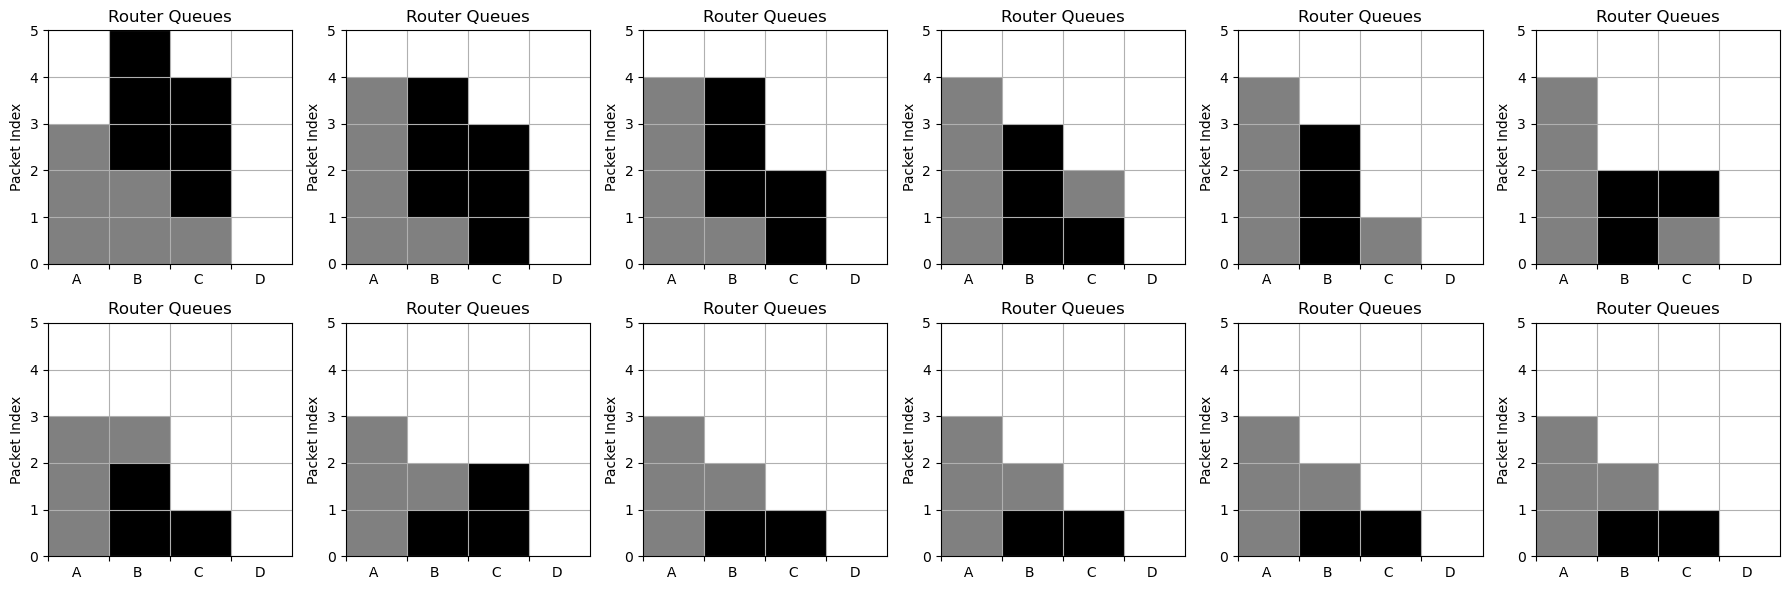

In [21]:
# Code to simulate BCP
all_snapshots = []
num_iters = 12

for iter in range(num_iters):

    print(f"============\nIteration: {iter}\n============")
    
    eval_bcp(network, all_snapshots, queue_type="FIFO", debug=True)

plot_snapshots(all_snapshots)